# Search for orbital parameters

This notebook was created to find the best observational approach to as efficiently as possible find the orbital solution of the observed stripped stars. 

Author: Bethany Ludwig, some edits by Ylva Götberg

In [2]:
# Import some packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit

# This package includes a very useful Markov-Chain Monte Carlo method from Josh
import dynesty
from dynesty import plotting as dyplot  # plot of the results from the MCMC

sns.set(font="Serif",font_scale=1.2)

### Read fxcor results for a star

In [49]:
# Read the measurements of radial velocity that Maria did with fxcor
loc_fxcor_results = 'Data/smc-obs40434-2857_fxcor_results.dat'
star_name = loc_fxcor_results.split('/')[1].split('_fxcor')[0]
#rv_data = pd.read_csv('Data/lmc-obs45578-835_fxcor_results.dat',delimiter="\s+")
rv_data = pd.read_csv(loc_fxcor_results,delimiter=" ")

In [6]:
rv_data

,hjd_ref,hjd_obs,hjd_diff,spec_line,vrel,verr,tdr
0,2.458867e+06,2.458867e+06,0.00000,HeII_5411,-0.0001,0.000,6.058E7
1,2.458867e+06,2.458867e+06,0.00000,HeII_4686,-0.0000,0.000,5.179E7
2,2.458867e+06,2.458867e+06,0.00000,HeII_4542,-0.0001,0.000,4.526E7
3,2.458867e+06,2.458867e+06,0.00000,HeII_4201,-0.0002,0.000,4.310E7
4,2.458867e+06,2.458867e+06,0.00000,HeII_4026,-0.0000,0.000,1.547E8
5,2.458867e+06,2.458867e+06,0.00000,HeII4860/Hb,-0.0005,0.000,4.306E7
6,2.458867e+06,2.458867e+06,0.00000,HeII4339/Hc,-0.0002,0.000,4.351E7
7,2.458867e+06,2.458867e+06,0.00000,HeII4101/Hd,-0.0002,0.000,5.145E7
8,2.458867e+06,2.458867e+06,0.00000,HeII3969/He,-0.0000,0.000,7.082E7
9,2.458867e+06,2.458867e+06,0.00000,HeII3889/Hf,-0.0005,0.000,4.607E7


In [7]:
# What spectral lines have been used to find RVs? 
np.unique(rv_data['spec_line'])

array(['All_lines', 'All_lines_lite', 'Full', 'HeII3835/Hg',
       'HeII3889/Hf', 'HeII3969/He', 'HeII4101/Hd', 'HeII4339/Hc',
       'HeII4860/Hb', 'HeIIH_blend', 'HeIIH_blend_lite', 'HeII_4026',
       'HeII_4201', 'HeII_4542', 'HeII_4686', 'HeII_5411', 'HeII_iso'],
      dtype=object)

In [10]:
# What's happening here? 
class fit_spec:
    
    
    def __init__(self,spec_line_string):
    
        # Pick Line
        line = rv_data[rv_data['spec_line'] == spec_line_string]
        
        # Drop If 'INDEF'
        line = line[line['verr'] != 'INDEF']

        # Drop If 0 Error
        #line = line[line['verr'].astype(float) != 0]  # Why? This way, we lose the first datapoint... 
        
        # Rest Index
        line = line.reset_index(drop=True)
        
        # Get Data
        self.mjd = np.array([float(l) for l in line['hjd_obs']])
        self.mjd = self.mjd - np.min(self.mjd) + 1
        self.vrel = np.array([float(l) for l in line['vrel']])
        self.verr = np.array([float(l) for l in line['verr']])

        # Fit Line
        #popt, pcov = curve_fit(self.f, self.mjd,self.vrel)

        # Get range of mjds to fit over
        self.date_range = np.linspace(np.min(self.mjd)-1,np.max(self.mjd)+1,400)

        # Get Curve
        #self.vel = self.f(self.date_range,popt[0],popt[1],popt[2])
        
    
    # Curve to fit to - sinusoid
    def f(self,x,a,b,c):
        return a * np.sin(b * x) + c
    

In [23]:
# I think this is getting the data somehow via the functions above /Ylva (better description would be nice)
#HeII_iso = fit_spec('All_lines_lite')
HeII_iso = fit_spec('HeII_iso')

# Introducing a cheat, not sure if it will work
# I will add an error similar to the other measurements to be able to use the datapoint with verr=0
ind_verr_0 = HeII_iso.verr == 0.
HeII_iso.verr[ind_verr_0] = np.mean(HeII_iso.verr[ind_verr_0==False])


Text(0,0.5,'Radial velocity [km/s]')

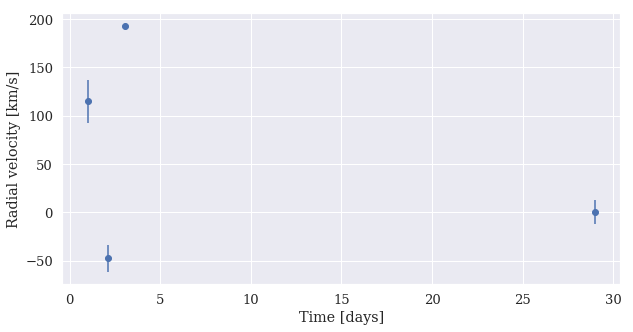

In [24]:
# plot results
plt.figure(figsize=(10,5))

# data
plt.errorbar(HeII_iso.mjd, HeII_iso.vrel, yerr=HeII_iso.verr,
             ls="none", marker="o")
plt.xlabel('Time [days]')
plt.ylabel('Radial velocity [km/s]')

In [39]:
def func(theta, x=HeII_iso.mjd):
    """
    Fit a sine wave with some amplitude `a`, 
    period `b`, phase `c`, and offset `d`.
    
    """
    
    a, b, c, d = theta
    
    return a * np.sin(2. * np.pi * x / b + c) + d

def loglike(theta):
    """
    Compute the log-likelihood from the predicted model.
    Assumes the data have Gaussian uncertainties.
    
    """
    
    
    pred = func(theta)
    
    chi2 = (HeII_iso.vrel - pred)**2 / HeII_iso.verr**2
    lnorm = np.log(2. * np.pi * HeII_iso.verr**2)
    
    lnl = -0.5 * np.sum(chi2 + lnorm)
    
    return lnl

def prior_transform(u):
    """
    Implementation of priors for nested sampling via the
    'prior transform'. Priors are assumed to be uniform
    over all parameters.
    
    """
    
    # Assign limits to the parameters in the sine curve 
    # (the phase is always allowed to be between 0 and 2pi)
    max_amplitude = 300.   # km/s (300 km/s is max for very tight subdwarf + WD binaries)
    min_Porb = 0.05        # days (0.05 days = 1.2 hours, this is close to subdwarf + WD minimum before touching)
    max_Porb = 500.        # days (stable Case B mass transfer may significantly widen orbits to hundreds of days)
    max_abs_vertical_offset = 400.  # km/s
    
    x = np.copy(u)
    x[0] = u[0] * max_amplitude         # amplitude, a, in km/s
    x[1] = u[1] * (max_Porb-min_Porb) + min_Porb    # period, b, in days
    x[2] = u[2] * 2. * np.pi   # phase, c, in radians
    x[3] = u[3] * (2*max_abs_vertical_offset) - max_abs_vertical_offset  # vertical offset, d in km/s
    
    return x

### Start of MCMC

In [40]:
# Getting the object that can do MCMC
sampler = dynesty.NestedSampler(loglike, prior_transform, 4, periodic=[2], 
                                bound='single', sample='rwalk', walks=50, nlive=2000)

In [41]:
# Walking around until dlogz has reached the limit of 0.010 (is the limit given somewhere?)
sampler.run_nested(dlogz=0.01)

51670it [05:11, 165.67it/s, +2000 | bound: 176 | nc: 1 | ncall: 2723802 | eff(%):  1.970 | loglstar:   -inf < -11.952 <    inf | logz: -33.172 +/-  0.134 | dlogz:  0.000 >  0.010]


In [45]:
#sampler.add_final_live()

iter: 69091 | +3000 | bound: 139 | nc: 1 | ncall: 5471915 | eff(%):  1.317 | loglstar:   -inf < -8.763 <    inf | logz: -20.541 +/-  0.064 | dlogz:  0.065 >  0.010                                   IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
# Get the results
res = sampler.results
res

         niter: 51670
        logvol: array([-4.99875042e-04, -9.99750083e-04, -1.49962512e-03, ...,
       -3.23313334e+01, -3.27367986e+01, -3.34299457e+01])
   information: array([ 8.29455738,  8.29505359,  8.29554978, ..., 17.71189439,
       17.71190678, 17.71191923])
    samples_id: array([1658,  724, 1605, ...,  165, 1866, 1973])
          logz: array([-3.56525971e+05, -3.54993353e+05, -3.30168525e+05, ...,
       -3.31719036e+01, -3.31718987e+01, -3.31718937e+01])
         bound: [<dynesty.bounding.UnitCube object at 0x7f3622b46f90>, <dynesty.bounding.Ellipsoid object at 0x7f3622b46f50>, <dynesty.bounding.Ellipsoid object at 0x7f3659f01390>, <dynesty.bounding.Ellipsoid object at 0x7f3659fdfc90>, <dynesty.bounding.Ellipsoid object at 0x7f3659fdfb90>, <dynesty.bounding.Ellipsoid object at 0x7f3659fdf6d0>, <dynesty.bounding.Ellipsoid object at 0x7f3659fdfd10>, <dynesty.bounding.Ellipsoid object at 0x7f3659fdf110>, <dynesty.bounding.Ellipsoid object at 0x7f3630b96490>, <dynesty.bou

#### Look at the results from the MCMC walker

Text(0.5,1,'smc-obs40434-2857')

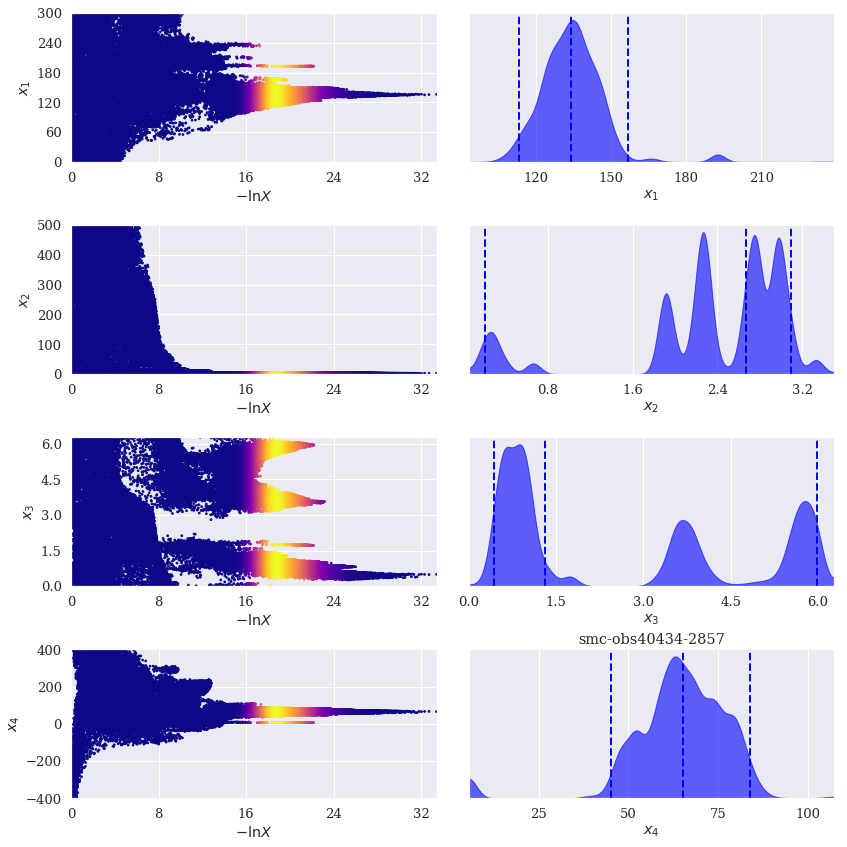

In [50]:
# This cool diagram is showing results of best-matching solutions of the parameters
# if y = a*sin((2pi/b)x+c) + d, then
# x1 = a (amplitude)
# x2 = b (orbital period)
# x3 = c (phase)
# x4 = d (vertical offset)
dyplot.traceplot(res)
plt.tight_layout()

# I would like to understand how to manipulate this figure and in particular the data in this figure. 
# Here is just a way to add the name of the star for documentation purposes.
plt.title(star_name) 

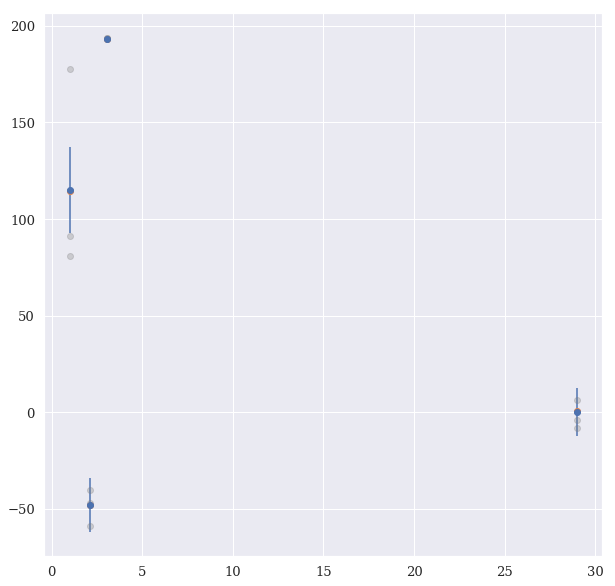

In [51]:
# plot results
plt.figure(figsize=(10,10))

# data
plt.errorbar(HeII_iso.mjd, HeII_iso.vrel, yerr=HeII_iso.verr,
             ls="none", marker="o")

# maixmum-likelihood fit
plt.plot(HeII_iso.mjd, func(res.samples[-1], x=HeII_iso.mjd), marker='o', linestyle='none')

# random samples
for s in res.samples[np.random.choice(len(res.samples), size=3, 
                                      p=np.exp(res.logwt)/np.sum(np.exp(res.logwt)))]:
    plt.plot(HeII_iso.mjd, func(s, x=HeII_iso.mjd), alpha=0.3, color='gray', marker='o', linestyle='none')

(<Figure size 1152x1152 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000265089B70C8>,
       dtype=object))

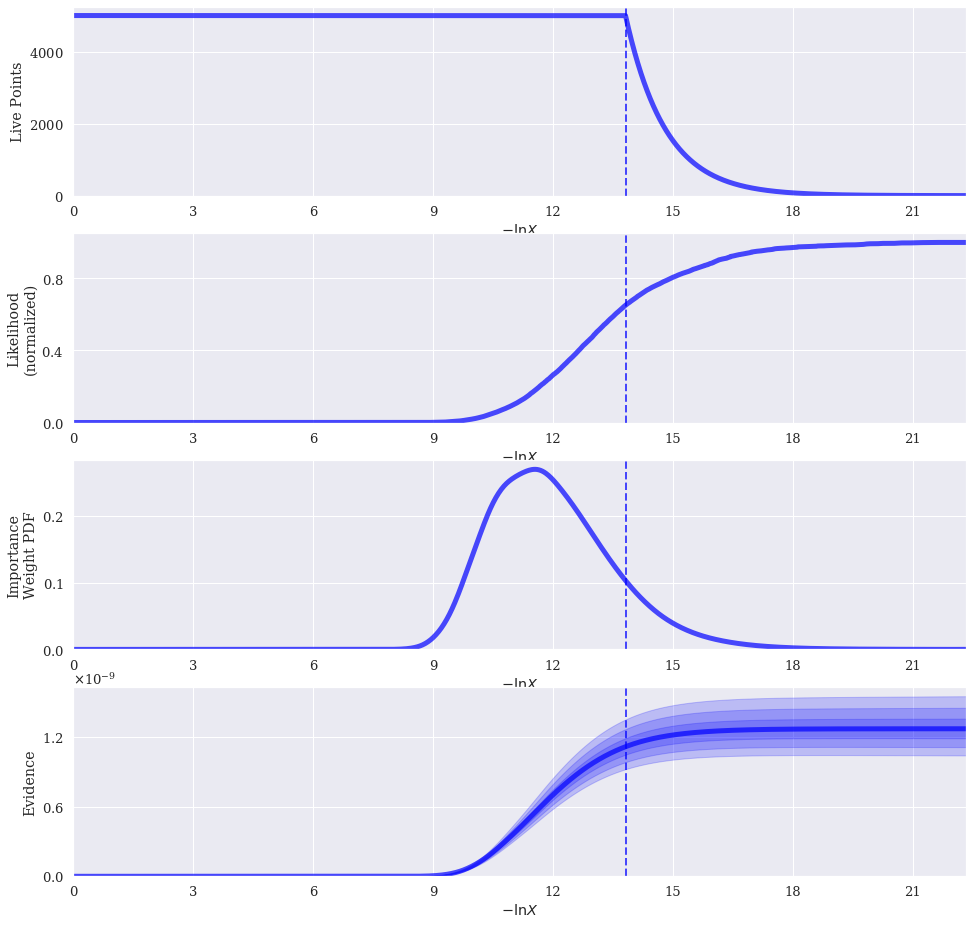

In [63]:
dyplot.runplot(res)

AttributeError: 'fit_spec' object has no attribute 'date_range'

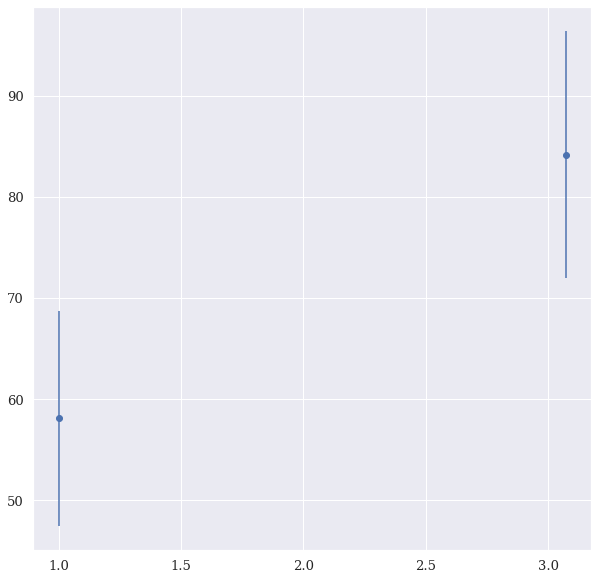

In [14]:
HeII_iso = fit_spec('HeIIH_blend')

plt.figure(figsize=(10,10))
plt.errorbar(HeII_iso.mjd,HeII_iso.vrel,yerr = HeII_iso.verr,ls="none",marker="o")
plt.plot(HeII_iso.date_range,HeII_iso.vel)


/home/bethany/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


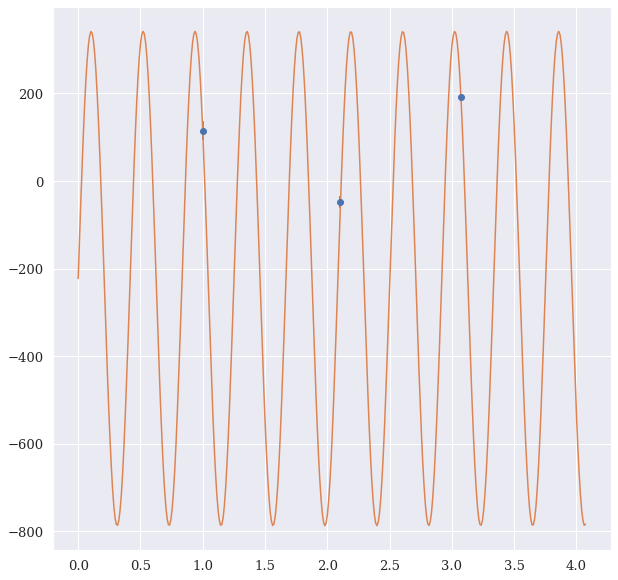

In [7]:
HeII_iso = fit_spec('HeII_iso')

plt.figure(figsize=(10,10))
plt.errorbar(HeII_iso.mjd,HeII_iso.vrel,yerr = HeII_iso.verr,ls="none",marker="o")
plt.plot(HeII_iso.date_range,HeII_iso.vel)

In [8]:
HeII_iso = fit_spec('HeII_4026')

plt.figure(figsize=(10,10))
plt.errorbar(HeII_iso.mjd,HeII_iso.vrel,yerr = HeII_iso.verr,ls="none",marker="o")
plt.plot(HeII_iso.date_range,HeII_iso.vel)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.